# < JAZIM> 

# Importing Libraries

In [1]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
from sklearn.preprocessing import LabelEncoder

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pickle

**Getting the data

In [4]:
data=pd.read_csv('C:\\Users\\HP\\Desktop\\DATA SETS\\cyberbullying_tweets.csv')

# REVIEW OF THE DATA SET

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [6]:
data.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [7]:
data.sample(20)

,tweet_text,cyberbullying_type
46551,Look at this hating face lmao sure is living i...,ethnicity
7896,#MKR everyone looks tired,not_cyberbullying
14115,@LibrosOverHos @anylaurie16 Not a gay joke. A ...,gender
24259,"@MetroidThief email, but basically, yes.",other_cyberbullying
3872,Bugger...NOT... Bye Bye Blondes... #MKR,not_cyberbullying
41821,If they didn’t do anything about gun control w...,ethnicity
36664,my biggest flex is that i wasn’t a bully in hi...,age
15739,Sorry I just call females bitches the same way...,gender
23500,And both segments are shit. And advocating or ...,religion
13457,Can't there be one day at work without gay ana...,gender


## Checking for missing values in the data set

In [8]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

### No null values found

In [9]:
#Shape of the data set or dimersions of the data set
print('The number of rows present: ',data.shape[0])
print('The number of columns present: ',data.shape[1])

The number of rows present:  47692
The number of columns present:  2


In [10]:
#Columns/ attributes present in the data set
print('The different columns present in the data set is: ', data.columns)

The different columns present in the data set is:  Index(['tweet_text', 'cyberbullying_type'], dtype='object')


In [11]:
#Looking for different types of data present in the cyber bullying columns
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

### We can see that there are six distinct types of cyber bullying present in the columns. Let us look the count of different types of cyber bullying present.

In [12]:
#Count of different types of tweets in the data set
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

#### It can be seen that there are almost equal number of distribution of different types of cyberbulling tweets in the data set.

# We will be renaming the columns for better understanding

In [13]:
data=data.rename(columns={'tweet_text':'Text', 'cyberbullying_type':'Sentiment'})

In [14]:
data.head()

,Text,Sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


##  In this part we are going to encode each type of cyber bullying type into a number ranging from 1 - 6

In [15]:
data['Sentiment'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: Sentiment, dtype: int64

## The encoding will be done as follows:
#### 1.religion                          1
#### 2.age                                 2
#### 3.gender                           3
#### 4.ethnicity                        4
#### 5.not_cyberbullying        5 
#### 6.other_cyberbullying    6

In [16]:
labelencoder=LabelEncoder()

#data.drop('Encoded_Sentiment',inplace=True, axis=1)


data['Sentiment_encoded']=labelencoder.fit_transform(data['Sentiment'])
data.head(15)

,Text,Sentiment,Sentiment_encoded
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,3
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,3
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,3
8,@stockputout everything but mostly my priest,not_cyberbullying,3
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,3


In [17]:
data[['Sentiment','Sentiment_encoded']].value_counts()

Sentiment            Sentiment_encoded
religion             5                    7998
age                  0                    7992
gender               2                    7973
ethnicity            1                    7961
not_cyberbullying    3                    7945
other_cyberbullying  4                    7823
dtype: int64

In [18]:
stop_words=set(stopwords.words('english'))

## < /JAZIM>

## < NANDU>

# Preprocessing of text in the data set


### Function to remove emojis

In [19]:
def strip_emoji(text):
    return emoji.replace_emoji(text,replace='')

## Function to convert text to lower case, remove(/r, /n character), URLs, non-utf characters, number, punctuation, stopwords

In [20]:
def strip_all_entities(text):
    text = text.replace('\r','').replace('\n',' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+',r'1',text)
    text = re.sub('[0-9]+', '',text)
    stopchars = string.punctuation
    table = str.maketrans('', '',stopchars)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

## Functions to remove contractions

In [21]:
def decontract(text):
    text = re.sub(r"can\'t"," cannot", text)
    text = re.sub(r"n\'t"," not", text)
    text = re.sub(r"\'re"," are", text)
    text = re.sub(r"\'s"," is", text)
    text = re.sub(r"\'d"," would", text)
    text = re.sub(r"\'ll"," will", text)
    text = re.sub(r"\'t"," not", text)
    text = re.sub(r"\'ve"," have", text)
    text = re.sub(r"\'m"," am", text)
    return text

## Function to clean hashtags

In [22]:
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hastags)\b)[\w-]+(?=(?:\s+#[w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

## Function to filter special character such as dollar and &

In [23]:
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if( '$' in word )  | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

## Function to remove multiple sequence spaces

In [24]:
def remove_mult_spaces(text):
    return re.sub("\s\s+", " ", text)

## Function to apply stemming to words

In [25]:
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

## Function to apply lemmatization to words

In [26]:
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

# A super function which will be used to preprocess text by applying all the above functions:

In [27]:
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    text = lemmatize(text)
    return text

In [28]:
data['Cleaned_Text'] = data['Text'].apply(preprocess)
data.head(10)

,Text,Sentiment,Sentiment_encoded,Cleaned_Text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3,isi account pretend kurdish account like islam...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,3,ye test god good bad indiffer weird whatev pro...
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,3,itu sekolah ya bukan tempat bulli ga jauh kaya...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,3,karma hope bite kat butt nasti mkr
8,@stockputout everything but mostly my priest,not_cyberbullying,3,everyth mostli priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,3,rebecca black drop school due bulli


## Cleaned text from the tweets have been added in the data frame

## Dealing with duplicate text in the data frame

In [29]:
data['Text'].duplicated().sum()

1675

In [30]:
data['Cleaned_Text'].duplicated().sum()

3041

In [31]:
data.drop_duplicates('Cleaned_Text',inplace = True)

## Tokenization of words

In [32]:
data['words_list'] = data['Cleaned_Text'].apply(word_tokenize)
data

,Text,Sentiment,Sentiment_encoded,Cleaned_Text,words_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like..."
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,black ppl expect anyth depend anyth yet free p...,"[black, ppl, expect, anyth, depend, anyth, yet..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,turner withhold disappoint turner call court a...,"[turner, withhold, disappoint, turner, call, c..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,swear god dumb nigger bitch got bleach hair re...,"[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,yea fuck rt your nigger fuck unfollow fuck dum...,"[yea, fuck, rt, your, nigger, fuck, unfollow, ..."


# < /NANDU >

# < SAJIDHA>

# VISUALIZATION OF THE DATA 

In [33]:
length = []
for text in data.words_list:
    tweet_len = len(text)
    length.append(tweet_len)
data['length'] = length

In [34]:
data['length'].describe()

count    44651.000000
mean        13.376251
std          8.373548
min          0.000000
25%          7.000000
50%         12.000000
75%         19.000000
max        384.000000
Name: length, dtype: float64

<AxesSubplot:xlabel='length'>

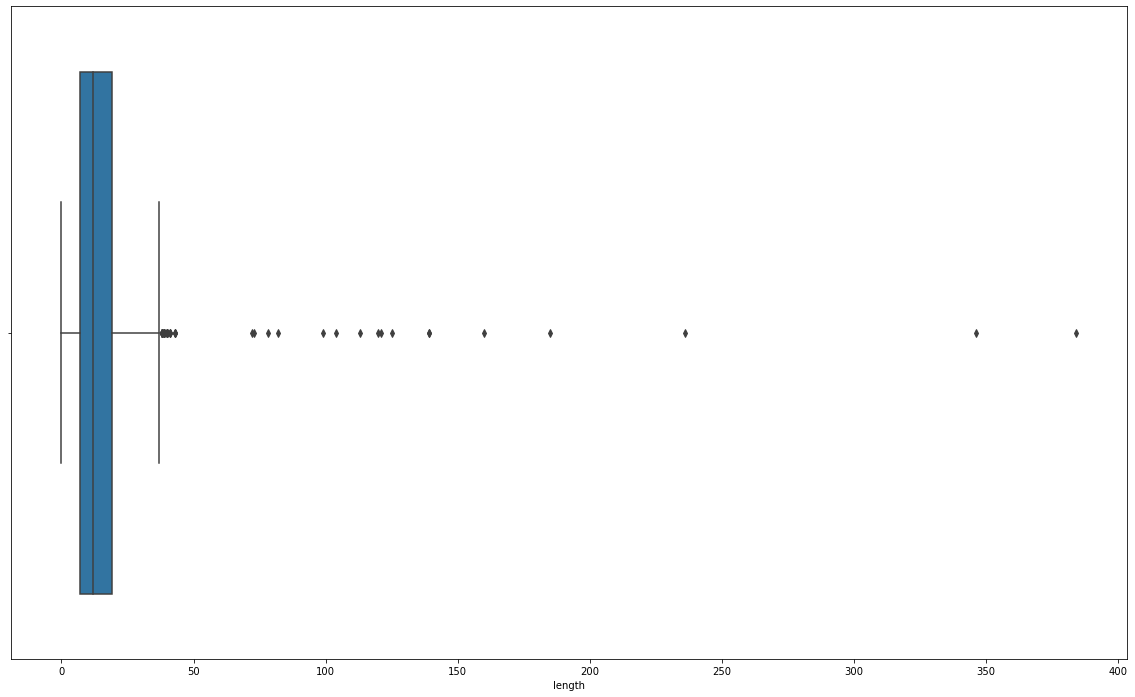

In [35]:
plt.figure(figsize=(20,12))
sns.boxplot(x='length', data=data)

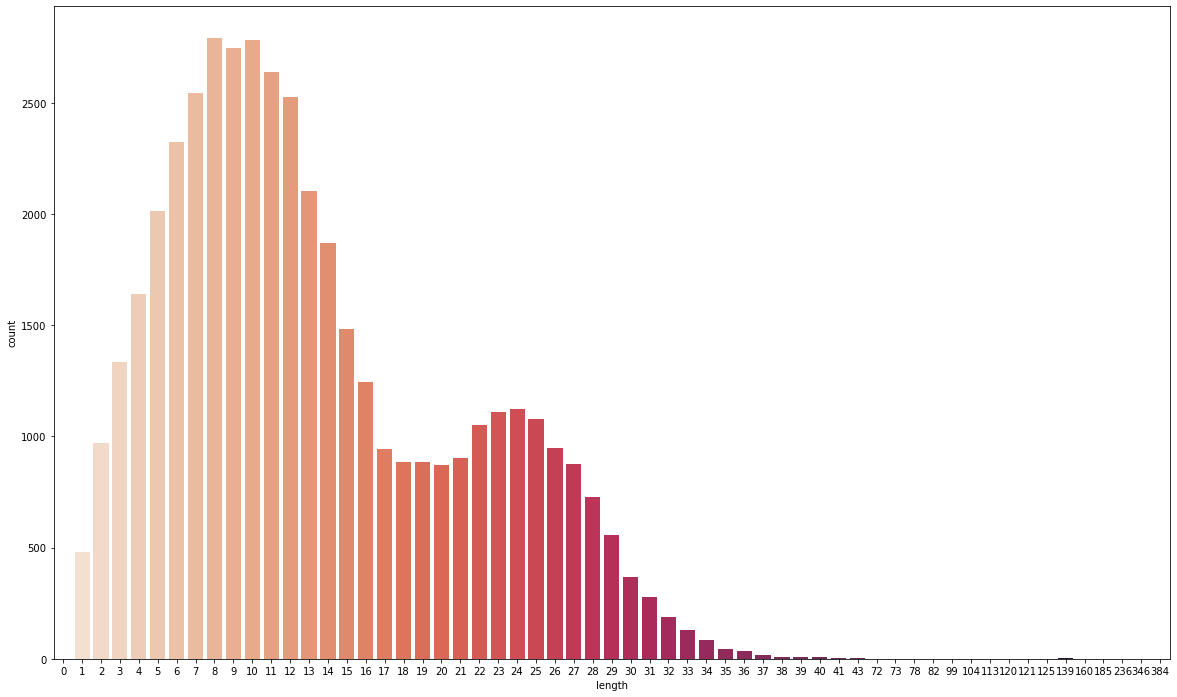

In [36]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='length', data=data, palette='rocket_r')

In [37]:
data.shape

(44651, 6)

#  Function to create a WordCloud

In [38]:
data.head()

,Text,Sentiment,Sentiment_encoded,Cleaned_Text,words_list,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8


In [39]:
data.Sentiment.value_counts()

religion               7952
age                    7884
ethnicity              7770
not_cyberbullying      7646
gender                 7620
other_cyberbullying    5779
Name: Sentiment, dtype: int64

## Splitting data based on sentiment for data exploration

In [40]:
notcyber_bullying_type = data[data['Sentiment']=='not_cyberbullying']
gender_type = data[data['Sentiment']=='gender']
religion_type = data[data['Sentiment']=='religion']
other_cyberbullying_type = data[data['Sentiment']=='other_cyberbullying']
age_type = data[data['Sentiment']=='age']
ethnicity_type = data[data['Sentiment']=='ethnicity']

# EDA OF THE DATA SET

## GENDER BASED CYBER BULLYING

In [41]:
gender = Counter([item for sublist in gender_type['words_list'] for item in sublist])
top20_gender = pd.DataFrame(gender.most_common(20))
top20_gender.columns = ['Top Words','Count']
top20_gender.style.background_gradient(cmap='Reds')

,Top Words,Count
0,joke,5179
1,rape,4070
2,gay,3852
3,call,1401
4,make,1283
5,rt,1221
6,woman,1182
7,bitch,1146
8,femal,1108
9,peopl,988


## RELIGION BASED CYBERBULLYING

In [42]:
religion = Counter([item for sublist in religion_type['words_list'] for item in sublist])
top20_religion = pd.DataFrame(religion.most_common(20))
top20_religion.columns = ['Top Words','Count']
top20_religion.style.background_gradient(cmap='Reds')

,Top Words,Count
0,muslim,4618
1,idiot,3075
2,islam,2440
3,christian,2132
4,u,1922
5,terrorist,1378
6,right,1289
7,like,1276
8,support,1251
9,woman,1247


## AGE BASED CYBER BULLYING

In [43]:
age = Counter([item for sublist in age_type['words_list'] for item in sublist])
top20_age = pd.DataFrame(age.most_common(20))
top20_age.columns = ['Top Words','Count']
top20_age.style.background_gradient(cmap='Reds')

,Top Words,Count
0,bulli,8899
1,school,8426
2,high,4861
3,girl,4616
4,like,2076
5,get,1051
6,one,1044
7,peopl,934
8,got,842
9,kid,809


## ETHNICITY BASED CYBERBULLYING

In [44]:
ethnicity = Counter([item for sublist in ethnicity_type['words_list'] for item in sublist])
top20_ethnicity = pd.DataFrame(ethnicity.most_common(20))
top20_ethnicity.columns = ['Top Words','Count']
top20_ethnicity.style.background_gradient(cmap='Reds')

,Top Words,Count
0,fuck,5892
1,nigger,5456
2,dumb,5003
3,as,2241
4,black,2134
5,u,2107
6,white,1557
7,call,1381
8,peopl,1182
9,rt,1166


##  OTHER TYPES OF CYBERBULLYING

In [45]:
other_cyberbullying = Counter([item for sublist in other_cyberbullying_type['words_list'] for item in sublist])
top20_other_cyberbullying = pd.DataFrame(other_cyberbullying.most_common(20))
top20_other_cyberbullying.columns = ['Top Words','Count']
top20_other_cyberbullying.style.background_gradient(cmap='Reds')

,Top Words,Count
0,bulli,882
1,rt,727
2,fuck,509
3,like,424
4,get,393
5,peopl,353
6,go,277
7,idiot,261
8,know,241
9,think,237


## TWEET WITHOUT CYBERBULLYING

In [46]:
not_cyberbullying = Counter([item for sublist in notcyber_bullying_type['words_list'] for item in sublist])
top20_not_cyberbullying = pd.DataFrame(not_cyberbullying.most_common(20))
top20_not_cyberbullying.columns = ['Top Words','Count']
top20_not_cyberbullying.style.background_gradient(cmap='Reds')

,Top Words,Count
0,mkr,1674
1,bulli,1102
2,rt,785
3,like,424
4,get,423
5,go,394
6,school,374
7,kat,286
8,would,286
9,peopl,272


In [47]:
data.head(10)

,Text,Sentiment,Sentiment_encoded,Cleaned_Text,words_list,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,3,ye test god good bad indiffer weird whatev pro...,"[ye, test, god, good, bad, indiffer, weird, wh...",11
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,3,itu sekolah ya bukan tempat bulli ga jauh kaya...,"[itu, sekolah, ya, bukan, tempat, bulli, ga, j...",10
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,3,karma hope bite kat butt nasti mkr,"[karma, hope, bite, kat, butt, nasti, mkr]",7
8,@stockputout everything but mostly my priest,not_cyberbullying,3,everyth mostli priest,"[everyth, mostli, priest]",3
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,3,rebecca black drop school due bulli,"[rebecca, black, drop, school, due, bulli]",6


In [48]:
data.Sentiment.value_counts()

religion               7952
age                    7884
ethnicity              7770
not_cyberbullying      7646
gender                 7620
other_cyberbullying    5779
Name: Sentiment, dtype: int64

In [49]:
sentiments = ['religion','age','ethnicity','gender','not_cyberbullying','other_cyberbullying']

In [50]:
data.head()

,Text,Sentiment,Sentiment_encoded,Cleaned_Text,words_list,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8


In [51]:
data.columns

Index(['Text', 'Sentiment', 'Sentiment_encoded', 'Cleaned_Text', 'words_list',
       'length'],
      dtype='object')

# </ SAJIDHA>

# < SARANYA>

# Splitting the data into train and test sets

In [52]:
X, Y = data['Cleaned_Text'], data['Sentiment_encoded']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify=Y, random_state= 25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(35720,) (8931,) (35720,) (8931,)


## tf-idf vectorization

In [54]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(35720, 31895)
(8931, 31895)


In [55]:
X_train_tf

<35720x31895 sparse matrix of type '<class 'numpy.float64'>'
	with 440320 stored elements in Compressed Sparse Row format>

In [56]:
X_test_tf

<8931x31895 sparse matrix of type '<class 'numpy.float64'>'
	with 105165 stored elements in Compressed Sparse Row format>

# Trying different ML models

## Logistic Regression

In [57]:
log_reg = LogisticRegression()

In [58]:
log_reg.fit(X_train_tf, Y_train)

LogisticRegression()

In [59]:
log_cv_score = cross_val_score(log_reg, X_train_tf, Y_train, cv=5, scoring= 'f1_macro', n_jobs=-1)


In [60]:
mean_log_cv = np.mean(log_cv_score)
mean_log_cv

0.8251150954823713

In [61]:
#ypred = log_reg.predict(X_test_tf)
#print(log_reg.score(X_test_tf, Y_test))

## Support Vector Classifier

In [62]:
lin_svc = LinearSVC()


In [63]:
lin_svc_cv_score = cross_val_score(lin_svc,X_train_tf,Y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_lin_svc_cv = np.mean(lin_svc_cv_score)
mean_lin_svc_cv


0.8227953965536946

## Naive Bayes Classifier

In [64]:
multiNB = MultinomialNB()

In [65]:
multiNB_cv_score = cross_val_score(multiNB,X_train_tf,Y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_multiNB_cv = np.mean(multiNB_cv_score)
mean_multiNB_cv


0.6741382100970938

## Decison Tree Classifier


In [66]:
dtree = DecisionTreeClassifier()

In [67]:
dtree_cv_score = cross_val_score(dtree,X_train_tf,Y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_dtree_cv = np.mean(dtree_cv_score)
mean_dtree_cv


0.8081749329058084

## RandomForest Classifier

In [68]:
rand_forest = RandomForestClassifier()

In [69]:
rand_forest_cv_score = cross_val_score(rand_forest,X_train_tf,Y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_rand_forest_cv = np.mean(rand_forest_cv_score)
mean_rand_forest_cv

0.8298914552159429

## Adaboost Classifier

In [70]:
adab = AdaBoostClassifier()


In [71]:
adab_cv_score = cross_val_score(adab,X_train_tf,Y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_adab_cv = np.mean(adab_cv_score) 
mean_adab_cv

0.7590507606257052

## By trying different models we can see logistic regression, svm and random forest
## classifier performed similarly, so among these we will go with svm model as it is
## more generalised and light
## Fine Tuning Support Vector Classifier

In [72]:
svc1 = LinearSVC()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],
'loss':['hinge','squared_hinge'],
'fit_intercept':[True,False]}
grid_search = GridSearchCV(svc1,param_grid,cv=5,scoring='f1_macro',n_jobs=-1,verbose=0,return_train_score=True)
grid_search.fit(X_train_tf,Y_train)


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge']},
             return_train_score=True, scoring='f1_macro')

In [73]:
grid_search.best_estimator_

LinearSVC(C=1, loss='hinge')

In [74]:
grid_search.best_score_

0.8271200193542588

# MODEL EVALUATION

In [75]:
lin_svc.fit(X_train_tf, Y_train)
y_pred = lin_svc.predict(X_test_tf)

In [76]:
def print_confusion_matrix(confusion_matrix, class_names, figsize= (10,7), fontsize = 14):
    df_cm = pd.DataFrame(confusion_matrix, index =class_names, columns = class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot = True, fmt = 'd')
    except ValueError:
        raise ValueError('Confusion matrix values must be integer.')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Preiction')
    

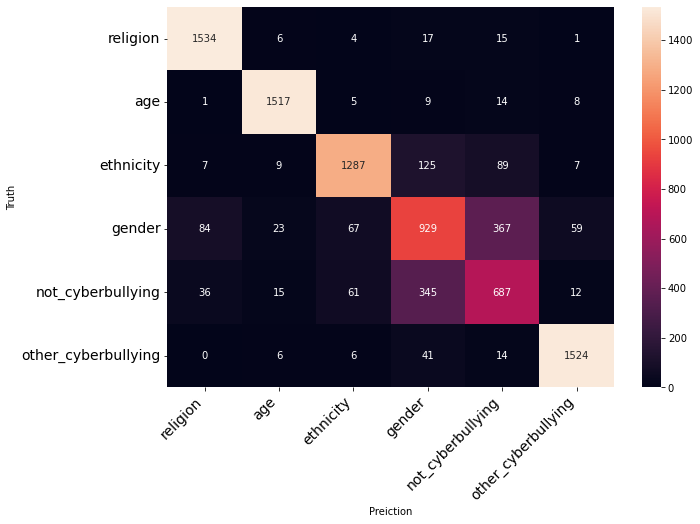

In [77]:
cm = confusion_matrix(Y_test, y_pred)
print_confusion_matrix(cm, sentiments)

In [78]:
print('Classification Report\n', classification_report(Y_test, y_pred, target_names=sentiments))

Classification Report
                      precision    recall  f1-score   support

           religion       0.92      0.97      0.95      1577
                age       0.96      0.98      0.97      1554
          ethnicity       0.90      0.84      0.87      1524
             gender       0.63      0.61      0.62      1529
  not_cyberbullying       0.58      0.59      0.59      1156
other_cyberbullying       0.95      0.96      0.95      1591

           accuracy                           0.84      8931
          macro avg       0.82      0.83      0.82      8931
       weighted avg       0.84      0.84      0.84      8931



# Saving model

In [79]:
pickle.dump(tf_idf, open('vectorizer.pkl', 'wb'))
pickle.dump(lin_svc, open('model.pkl', 'wb'))

# < /SARANYA>